In [1]:
import os
import astropy
import numpy as np
from astropy.table import Table
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
directory = r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs\\"

In [3]:
final_rcf_table = Table.from_pandas(pd.read_hdf("C:/Users/20xha/Documents/Caltech/Research/final_rcf_table.h5"))

In [4]:
SEDM_ML_sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/SEDM_ML_sample.ascii", format = "ascii")

In [5]:
run_list = os.listdir(r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs/")[3::]

In [6]:
ResultsTable = Table(
                    names=("ZTF_Name", "ZTF_File", "Closest", "Top15", "Good"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64", "U64", "U64", "U64"
                          )
                    )
count = 0
for i in final_rcf_table["ZTF_Name"]:
    row = []
    row.append(i)
    files = glob.glob(directory + i + "\\*.readableoutput")
    if(len(files) != 0):
        row.append(files[0].split("\\")[-1])
        try:
            templates_list = Table.read(files[0], format = "ascii")
            row.append(templates_list[0]["type"])
            Top15 = templates_list[0:15]
            c = Counter(Top15["type"])
            row.append(c.most_common()[0][0])
            GoodMatches = templates_list[np.where(templates_list["grade"] == "good")]
            c = Counter(GoodMatches["type"])
            row.append(c.most_common()[0][0])
            count += 1
            ResultsTable.add_row(row)
            if count % 100 == 0:
                print(count)
        except:
            print(i)

100
200
300
400
500


In [7]:
ResultsTable[0]

ZTF_Name,ZTF_File,Closest,Top15,Good
str64,str64,str64,str64,str64
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1_snid_templates.readableoutput,Ia-csm,Ia-norm,Ia-norm


In [8]:
final_rcf_table[0]

ZTF_Name,TNS_Name,discovered_by,tns_internal_name,RA_sn,Dec_sn,sn_type,z_sn,g_jd_max,g_max,g_unc_max,r_jd_max,r_max,r_unc_max,ebv,host_name_PS1,RA_host_PS1,Dec_host_PS1,z_host,sep,projected_kpc,gKron_PS1,rKron_PS1,iKron_PS1,zKron_PS1,yKron_PS1,w1_host,w2_host,ebv_host
str12,str9,str13,str29,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aabssth,SN2018aex,ZTF,ZTF18aabssth,165.1891017637735,22.287497041839774,II,0.026000000000000002,2458494.0531481,20.44230842590332,0.1942138969898224,2458218.7148727,18.741601943969727,0.0452471598982811,0.01536,PSO J165.1878+22.2877,165.18778907,22.28771869,0.022914,4.444857426598462,2.0566548608097266,16.885400772094727,16.492399215698242,16.382200241088867,16.378400802612305,16.610000610351562,15.79401524178536,16.38349243564084,0.015369999999999997


In [9]:
JoinedResults = astropy.table.join(ResultsTable, final_rcf_table)

In [10]:
np.unique(JoinedResults["Closest"])

AGN
Gal
II-pec
IIL
IIP
IIb
IIn
Ia-91T
Ia-91bg
Ia-csm
Ia-norm


In [11]:
np.unique(JoinedResults["sn_type"])

II
II-87A
IIb
IIn
Ia
Ia-02cx
Ia-91T
Ia-91bg
Ia-SC
Ib
Ib/c


In [12]:
counters = [0, 0, 0]
closest_list = []
top15_list = []
good_list = []

In [13]:
for i in JoinedResults:
    correct_id = i["sn_type"]
    
    if (correct_id in i["Closest"]):
        counters[0] += 1
    else:
        closest_list.append(np.where(JoinedResults["ZTF_Name"] == i["ZTF_Name"])[0][0])
        
    if (correct_id in i["Top15"]):
        counters[1] += 1
    else:
        top15_list.append(np.where(JoinedResults["ZTF_Name"] == i["ZTF_Name"])[0][0])
        
    if (correct_id in i["Good"]):
        counters[2] += 1
    else:
        good_list.append(np.where(JoinedResults["ZTF_Name"] == i["ZTF_Name"])[0][0])

In [14]:
np.asarray(counters)/(len(JoinedResults))

array([0.82735043, 0.83247863, 0.81025641])

In [15]:
len(JoinedResults)

585

In [16]:
JoinedResults[closest_list]["ZTF_Name", "sn_type", "Closest"].to_pandas().to_csv("SNID_Errors/Closest_Errors.csv")

In [17]:
JoinedResults[top15_list]["ZTF_Name", "sn_type", "Top15"].to_pandas().to_csv("SNID_Errors/Top15_Errors.csv")

In [18]:
JoinedResults[good_list]["ZTF_Name", "sn_type", "Good"].to_pandas().to_csv("SNID_Errors/Good_Errors.csv")

In [19]:
wrong_closest = JoinedResults[closest_list]["ZTF_Name", "sn_type", "Closest"]

In [20]:
wrong_top15 = JoinedResults[top15_list]["ZTF_Name", "sn_type", "Top15"]

In [21]:
wrong_good = JoinedResults[good_list]["ZTF_Name", "sn_type", "Good"]

In [34]:
Table_List = []
count = 0
for i in final_rcf_table["ZTF_Name"]:
    row = []
    row.append(i)
    files = glob.glob(directory + i + "\\*.readableoutput")
    if(len(files) != 0):
        row.append(files[0].split("\\")[-1])
        templates_list = Table.read(files[0], format = "ascii")
        Table_List.append([i, templates_list])
        count += 1
        if count % 100 == 0:
            print(count)
Table_List_Numpy = np.asarray(Table_List)

100
200
300
400
500


In [36]:
np.save("SNID_results", Table_List_Numpy)

In [39]:
Table_List_Numpy = np.load("SNID_results.npy", allow_pickle=True)

In [47]:
Max = 0
Min = 100
for i in Table_List_Numpy:
    Temp_Max = np.max(i[1]["rlap"])
    Temp_Min = np.min(i[1]["rlap"])
    if(Temp_Max > Max):
        Max = Temp_Max
    if(Temp_Min < Min):
        Min = Temp_Min

In [54]:
ranges = np.linspace(Max, Min, 1000)

In [153]:
ResultsTable_List_rlap = []
count = 0

for i in ranges:
    ResultsTable = Table(
                    names=("ZTF_Name", "Closest"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        if(np.max(j[1]["rlap"]) > i):
            row.append(j[1][0]["type"])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_rlap.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

100
200
300
400
500
600
700
800
900
1000


In [144]:
counters_rlap = [] 
for i in ResultsTable_List:
    counter = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_id = j["sn_type"]

        if (correct_id in j["Closest"]):
            counter += 1
    counters_rlap.append([i[0],counter,len(JoinedResults)])

In [145]:
counters_rlap = np.asarray(counters_rlap)

Text(0, 0.5, 'accuracy')

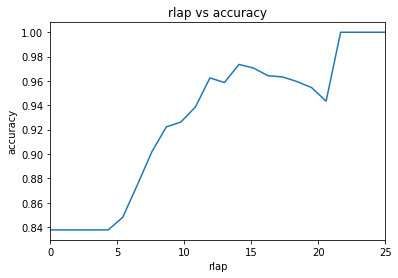

In [146]:
plt.plot(counters_rlap[:,0], counters_rlap[:,1]/counters_rlap[:,2])
plt.xlim(0, 25)
plt.title("rlap vs accuracy")
plt.xlabel("rlap")
plt.ylabel("accuracy")

In [163]:
counters[np.where(counters_rlap[:,1] == counters_rlap[:,2])][-1]

array([21.66790791, 40.        , 40.        ])

In [181]:
ResultsTable_List = []
count = 0

for i in range(0,16):
    ResultsTable = Table(
                    names=("ZTF_Name", "Top15"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        Top15 = j[1][0:15]
        c = Counter(Top15["type"])
        if(c.most_common()[0][1] >= i):
            row.append(c.most_common()[0][0])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

In [188]:
counters_number = [] 
for i in ResultsTable_List:
    counter = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_id = j["sn_type"]

        if (correct_id in j["Top15"]):
            counter += 1
        else:
            if(i[0] == 15):
                print()
    counters_number.append([i[0],counter,len(JoinedResults)])

  ZTF_Name    Top15   TNS_Name discovered_by tns_internal_name       RA_sn             Dec_sn      sn_type  z_sn     g_jd_max          g_max             g_unc_max          r_jd_max          r_max             r_unc_max        ebv       host_name_PS1     RA_host_PS1  Dec_host_PS1 z_host        sep           projected_kpc       gKron_PS1      rKron_PS1     iKron_PS1      zKron_PS1 yKron_PS1 w1_host w2_host ebv_host
------------ ------- --------- ------------- ----------------- ----------------- ----------------- ------- ----- --------------- ------------------ ------------------- --------------- ------------------ ------------------- ------- --------------------- ------------ ------------ ------ ------------------ ----------------- ------------------ --------- ------------------ --------- --------- ------- ------- --------
ZTF18abdpvnd Ia-norm SN2018dvf           ZTF      ZTF18abdpvnd 348.5225938789628 29.63338654031601   Ia-SC 0.046 2458319.9146181 17.395627975463867 0.05964351445436478 

In [183]:
counters_number = np.asarray(counters_number)

Text(0, 0.5, 'accuracy')

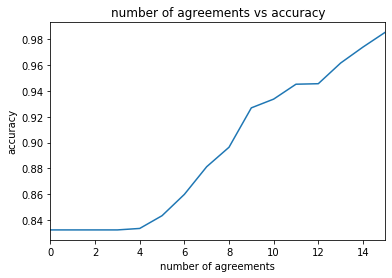

In [184]:
plt.plot(counters_number[:,0], counters_number[:,1]/counters_number[:,2])
plt.xlim(0, 15)
plt.title("number of agreements vs accuracy")
plt.xlabel("number of agreements")
plt.ylabel("accuracy")

In [187]:
counters_number[np.where(counters_number[:,1] < counters_number[:,2])]

array([[  0, 487, 585],
       [  1, 487, 585],
       [  2, 487, 585],
       [  3, 487, 585],
       [  4, 486, 583],
       [  5, 485, 575],
       [  6, 479, 557],
       [  7, 468, 531],
       [  8, 450, 502],
       [  9, 431, 465],
       [ 10, 394, 422],
       [ 11, 362, 383],
       [ 12, 330, 349],
       [ 13, 300, 312],
       [ 14, 261, 268],
       [ 15, 202, 205]])

In [160]:
ResultsTable_List_rlapz = []
count = 0

for i in ranges:
    ResultsTable = Table(
                    names=("ZTF_Name", "Closestz"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        if(np.max(j[1]["rlap"]) > i):
            low_redshift = j[1][np.where(j[1]["z"] < .2)]
            if(len(low_redshift) == 0):
                print(j)
            else:
                row.append(low_redshift[np.argmax(low_redshift["rlap"])]["type"])
                ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_rlapz.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

100
200
300
400
500
600
700
800
900
['ZTF18acbuemc'
 <Table length=1574>
 no.     sn      type    lap     rlap     z      zerr    age   age_flag grade
int32  str10     str8  float64 float64 float64 float64 float64  int32    str4
----- -------- ------- ------- ------- ------- ------- ------- -------- -----
    1  sn1983V Ic-norm    0.44   10.31  0.7207  0.0065    11.9        0  good
    2  sn1983V Ic-norm  0.4319    9.23  0.7185  0.0071    14.9        0  good
    3  sn1983V Ic-norm  0.4305    9.03  0.7179  0.0072    15.9        0  good
    4  sn1983V Ic-norm  0.4305    8.95   0.718  0.0073    16.9        0  good
    5  sn1983V Ic-norm  0.4305    8.05  0.7171  0.0081    17.9        0  good
    6  sn1990I Ib-norm   0.421    5.93  0.7194  0.0081    41.1        0  good
    7  sn1994I Ic-norm  0.5104    5.61   0.724  0.0105     2.6        0  good
    8  sn1994I Ic-norm  0.4007    5.25  0.7281  0.0127     0.1        0  good
    9  sn1991N Ic-norm  0.5429     5.2  0.7162  0.0157     0.0       

KeyboardInterrupt: 

In [148]:
counters_rlapz = [] 
for i in ResultsTable_List:
    counter = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_id = j["sn_type"]

        if (correct_id in j["Closest"]):
            counter += 1
    counters_rlapz.append([i[0],counter,len(JoinedResults)])

In [149]:
counters_rlapz = np.asarray(counters_rlapz)

Text(0, 0.5, 'accuracy')

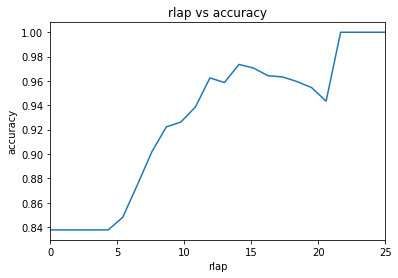

In [150]:
plt.plot(counters_rlapz[:,0], counters_rlapz[:,1]/counters_rlapz[:,2])
plt.xlim(0, 25)
plt.title("rlap vs accuracy")
plt.xlabel("rlap")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

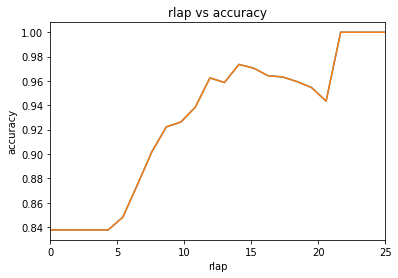

In [151]:
plt.plot(counters_rlapz[:,0], counters_rlapz[:,1]/counters_rlapz[:,2])
plt.plot(counters_rlap[:,0], counters_rlap[:,1]/counters_rlap[:,2])
plt.xlim(0, 25)
plt.title("rlap vs accuracy")
plt.xlabel("rlap")
plt.ylabel("accuracy")

In [156]:
ResultsTable_List_rlapz[-1][1]

ZTF_Name,Closestz
str64,str64
ZTF18aaemivw,Ia-csm
ZTF18aagrdcs,Ia-91T
ZTF18aahfzea,Ia-norm
ZTF18aahhqih,IIP
ZTF18aailmnv,Ia-norm
ZTF18aaklpdo,Ia-norm
ZTF18aamftst,IIn
ZTF18aamigmk,Ia-norm
ZTF18aansqun,Ia-norm


In [157]:
ResultsTable_List_rlap[-1][1]

ZTF_Name,Closest
str64,str64
ZTF18aaemivw,Ia-csm
ZTF18aagrdcs,Ia-91T
ZTF18aahfzea,Ia-norm
ZTF18aahhqih,IIP
ZTF18aailmnv,Ia-norm
ZTF18aaklpdo,Ia-norm
ZTF18aamftst,IIn
ZTF18aamigmk,Ia-norm
ZTF18aansqun,Ia-norm
